# DM Tolerance

Message from shivani

```
Data file                        : test1.fil
Header size (bytes)              : 401
Data size (bytes)                : 5505024
Data type                        : filterbank (topocentric)
Telescope                        : GMRT
Datataking Machine               : FAKE
Source Name                      : None
Source RA (J2000)                : 21:57:51.6
Source DEC (J2000)               : -01:17:09.4
Frequency of channel 1 (MHz)     : 1464.000000
Channel bandwidth      (MHz)     : -1.000000
Number of channels               : 336
Number of beams                  : 0
Beam number                      : 0
Time stamp of first sample (MJD) : 58002.546799638658
Gregorian date (YYYY/MM/DD)      : 2017/09/06
Sample time (us)                 : 1266.46875
Number of samples                : 16384
Observation length (seconds)     : 20.7
Number of bits per sample        : 8
Number of IFs                    : 1
```


I ran dedisperse_all for a DM range of 0 to 5000 and dm tol ranging from 1% to 50%. Column 1 is number of DM trials and Column 2 is dm$tol_value.log
```
2163 dm1.01.log
1497 dm1.02.log
1210 dm1.03.log
1041 dm1.04.log
926 dm1.05.log
842 dm1.06.log
776 dm1.07.log
723 dm1.08.log
680 dm1.09.log
643 dm1.10.log
611 dm1.11.log
584 dm1.12.log
559 dm1.13.log
537 dm1.14.log
518 dm1.15.log
500 dm1.16.log
484 dm1.17.log
469 dm1.18.log
456 dm1.19.log
443 dm1.20.log
432 dm1.21.log
421 dm1.22.log
410 dm1.23.log
401 dm1.24.log
392 dm1.25.log
384 dm1.26.log
376 dm1.27.log
368 dm1.28.log
361 dm1.29.log
354 dm1.30.log
348 dm1.31.log
341 dm1.32.log
336 dm1.33.log
330 dm1.34.log
324 dm1.35.log
319 dm1.36.log
314 dm1.37.log
310 dm1.38.log
305 dm1.39.log
301 dm1.40.log
296 dm1.41.log
292 dm1.42.log
288 dm1.43.log
284 dm1.44.log
281 dm1.45.log
277 dm1.46.log
274 dm1.47.log
270 dm1.48.log
267 dm1.49.log
264 dm1.50.log
```

Note that a tol value of 1.01 means 1% sacrifice in S/N and 1.50 is 50%

In [10]:
from pylab import *
import matplotlib as mpl
import seaborn as sns
import numpy as np

%matplotlib inline

In [21]:
s = '''
7911 dm1.001.log
2163 dm1.01.log
1497 dm1.02.log
1210 dm1.03.log
1041 dm1.04.log
926 dm1.05.log
842 dm1.06.log
776 dm1.07.log
723 dm1.08.log
680 dm1.09.log
643 dm1.10.log
611 dm1.11.log
584 dm1.12.log
559 dm1.13.log
537 dm1.14.log
518 dm1.15.log
500 dm1.16.log
484 dm1.17.log
469 dm1.18.log
456 dm1.19.log
443 dm1.20.log
432 dm1.21.log
421 dm1.22.log
410 dm1.23.log
401 dm1.24.log
392 dm1.25.log
384 dm1.26.log
376 dm1.27.log
368 dm1.28.log
361 dm1.29.log
354 dm1.30.log
348 dm1.31.log
341 dm1.32.log
336 dm1.33.log
330 dm1.34.log
324 dm1.35.log
319 dm1.36.log
314 dm1.37.log
310 dm1.38.log
305 dm1.39.log
301 dm1.40.log
296 dm1.41.log
292 dm1.42.log
288 dm1.43.log
284 dm1.44.log
281 dm1.45.log
277 dm1.46.log
274 dm1.47.log
270 dm1.48.log
267 dm1.49.log
264 dm1.50.log
'''

In [22]:
d = []
for line in s.split('\n'):
    if line == '':
        continue
    
    ndm, x = line.split()
    dmtol = float(x.replace('dm','').replace('.log',''))
    d.append((float(ndm), dmtol))
d = np.array(d)


In [47]:
f1=1.464 # GHz
bw = 0.336 # GHz
f2 = f1 - bw

tsamp = 1.266 # Millseconds
dmres = tsamp/4.15/(f2**-2 - f1**-2) #pc/cc
maxdm = 5000 # pc/cc
ndm = maxdm/dmres # number of trials

print 'f1', f1, 'bw', bw, 'f2', f2, 'tsamp', tsamp, 'dmres', dmres, 'maxdm', maxdm, 'ndm', ndm

f1 1.464 bw 0.336 f2 1.128 tsamp 1.266 dmres 0.955238212186 maxdm 5000 ndm 5234.29646785


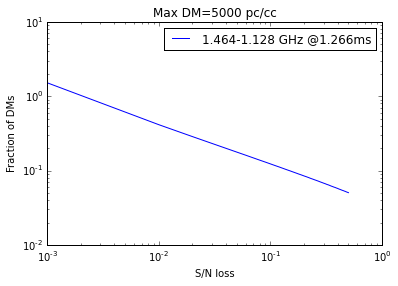

In [48]:

loglog((d[:, 1] - 1), d[:, 0]/ndm, label='{f1:0.3f}-{f2:0.3f} GHz @{tsamp:0.3f}ms'.format(**locals()))
xlabel('S/N loss')
ylabel('Fraction of DMs')
title('Max DM={maxdm:0.0f} pc/cc'.format(**locals()))
legend()

f1 1.464 bw 0.336 f2 1.128 tsamp 1.266 dmres 0.955238212186 maxdm 5000 ndm 5234.29646785
